c:\Users\hayk_\.conda\envs\dst\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception in thread Thread-6:
Traceback (most recent call last):
  File "c:\Users\hayk_\.conda\envs\dst\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "c:\Users\hayk_\.conda\envs\dst\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\hayk_\.conda\envs\dst\lib\subprocess.py", line 1495, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\hayk_\.conda\envs\dst\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 3: invalid start byte
c:\Users\hayk_\.conda\envs\dst\lib\site-packages\joblib\externals\loky\backen

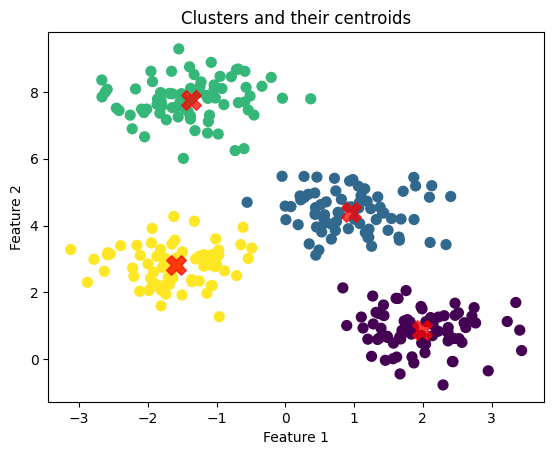

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data using make_blobs
# This will create a set of data points grouped into "centers" or clusters
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Use KMeans algorithm to find clusters
# n_clusters defines the number of clusters to form
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Predicting the clusters
y_kmeans = kmeans.predict(X)

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], s=50, c=y_kmeans, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Clusters and their centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


c:\Users\hayk_\.conda\envs\dst\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hayk_\.conda\envs\dst\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


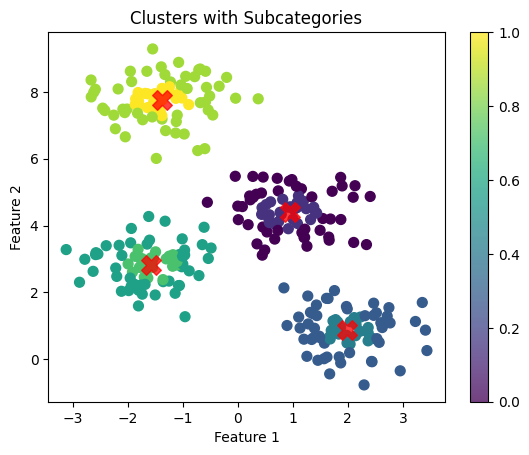

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

def classify_points(X, centroids, thresh_percent=30):
    """
    Classify each point in X based on its distance to the nearest centroid.
    Points are classified into 2*len(centroids) categories.
    
    Parameters:
    - X: numpy array, the coordinates of data points
    - centroids: numpy array, the coordinates of centroids
    - thresh_percent: float, the percentage of the max distance within a cluster used to define closeness threshold
    
    Returns:
    - labels: list, category labels for each point in X
    """
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    min_distances = distances.min(axis=0)
    closest_centroids = distances.argmin(axis=0)
    
    # Determine the threshold for being 'very close' to a centroid
    max_distance = min_distances.max()
    threshold = (max_distance * thresh_percent) / 100
    
    # Create labels 2*c where c is the cluster index if not so close, and 2*c+1 if very close
    labels = 2 * closest_centroids + (min_distances < threshold).astype(int)
    
    return labels

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
centroids = kmeans.cluster_centers_

# Classify points with the custom function
y_labels = classify_points(X, centroids, thresh_percent=30)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], s=50, c=y_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Clusters with Subcategories')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()  # Show color scale
plt.show()


In [4]:
y_labels

array([2, 7, 0, 7, 2, 2, 4, 1, 6, 6, 5, 6, 1, 6, 2, 0, 1, 2, 4, 4, 2, 3,
       0, 5, 5, 0, 3, 1, 4, 0, 6, 6, 0, 6, 7, 6, 6, 6, 4, 3, 0, 4, 0, 0,
       5, 4, 7, 5, 7, 2, 4, 2, 7, 3, 2, 5, 6, 4, 7, 2, 6, 1, 6, 4, 4, 5,
       6, 3, 6, 5, 1, 4, 7, 5, 4, 6, 5, 1, 3, 6, 2, 1, 2, 3, 6, 0, 3, 0,
       6, 7, 0, 3, 6, 5, 5, 0, 2, 2, 0, 4, 6, 2, 6, 3, 1, 3, 2, 0, 6, 0,
       4, 4, 2, 6, 3, 0, 7, 2, 2, 0, 4, 3, 4, 2, 2, 3, 3, 4, 2, 4, 6, 5,
       4, 2, 6, 4, 4, 6, 0, 6, 6, 4, 0, 4, 0, 4, 7, 0, 6, 7, 7, 1, 6, 0,
       2, 4, 6, 4, 3, 1, 6, 1, 1, 2, 1, 4, 4, 0, 2, 0, 1, 6, 2, 0, 4, 7,
       2, 2, 1, 4, 2, 0, 4, 5, 0, 1, 0, 1, 2, 6, 0, 4, 1, 1, 4, 5, 4, 0,
       4, 7, 0, 4, 2, 4, 0, 6, 5, 6, 1, 6, 1, 5, 0, 0, 7, 4, 4, 3, 2, 1,
       7, 2, 3, 4, 2, 4, 0, 6, 7, 0, 1, 6, 0, 2, 5, 1, 3, 5, 6, 5, 2, 0,
       2, 7, 7, 6, 7, 4, 5, 6, 0, 5, 2, 1, 5, 4, 4, 2, 3, 7, 1, 0, 4, 2,
       6, 4, 0, 6, 0, 3, 2, 4, 4, 0, 2, 2, 2, 0, 7, 7, 2, 2, 0, 3, 3, 2,
       6, 4, 6, 1, 2, 3, 6, 6, 7, 2, 2, 1, 6, 5], d

In [6]:
!pip install lime

  Using cached lime-0.2.0.1.tar.gz (275 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 24.5/24.5 MB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 313.4/313.4 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 1.6/1.6 MB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 224.5/224.5 kB 1.3 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=954825d39f387a1a3663329c68245613a9ff0e985309629f82e2b3adbf666111
  Stored in directory: c:\users\hayk_\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [10]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from lime import lime_tabular

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Use KMeans to find clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
centroids = kmeans.cluster_centers_

# Function to classify points as very close or not very close
def custom_classifier(X):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    min_distances = distances.min(axis=0)
    closest_centroids = distances.argmin(axis=0)
    max_distance = min_distances.max()
    threshold = (max_distance * 30) / 100
    labels = 2 * closest_centroids + (min_distances < threshold).astype(int)
    print(np.array(labels))
    return np.array(labels).reshape(-1, 1)

# Create a Lime Tabular Explainer
explainer = lime_tabular.LimeTabularExplainer(X, mode='classification', feature_names=['Feature 1', 'Feature 2'], class_names=[f'Cluster {2*i}-{["not so close", "very close"][i%2]}' for i in range(8)])

# Explain a prediction from the test set
idx = 10
exp = explainer.explain_instance(X[idx], custom_classifier, num_features=2)

# Display the explanation
fig = exp.as_pyplot_figure()
exp.show_in_notebook(show_table=True, show_all=False)
plt.show()


c:\Users\hayk_\.conda\envs\dst\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hayk_\.conda\envs\dst\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[1 2 3 ... 2 2 1]


c:\Users\hayk_\.conda\envs\dst\lib\site-packages\lime\lime_tabular.py:372: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  warnings.warn("""


IndexError: index 1 is out of bounds for axis 1 with size 1

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# KMeans to find centroids
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
centroids = kmeans.cluster_centers_

def custom_classifier_proba(X):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    min_distances = distances.min(axis=0)
    closest_centroids = distances.argmin(axis=0)
    max_distance = min_distances.max()
    threshold = (max_distance * 30) / 100
    
    # Initialize probabilities array
    probabilities = np.zeros((X.shape[0], 8))  # 8 classes (4 clusters * 2 categories each)
    
    for i in range(X.shape[0]):
        cluster_index = 2 * closest_centroids[i]
        if min_distances[i] < threshold:
            probabilities[i, cluster_index + 1] = 1  # "very close"
        else:
            probabilities[i, cluster_index] = 1  # "not so close"
    
    return probabilities


c:\Users\hayk_\.conda\envs\dst\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception in thread Thread-6:
Traceback (most recent call last):
  File "c:\Users\hayk_\.conda\envs\dst\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "c:\Users\hayk_\.conda\envs\dst\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\hayk_\.conda\envs\dst\lib\subprocess.py", line 1495, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\hayk_\.conda\envs\dst\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 3: invalid start byte
c:\Users\hayk_\.conda\envs\dst\lib\site-packages\joblib\externals\loky\backen

In [ ]:
!pip install shap

In [12]:
import shap

# Since KernelExplainer works well with any model, we use it for our custom classifier
explainer = shap.TreeExplainer(custom_classifier_proba, X)  
# Compute SHAP values for the first 10 points
shap_values = explainer.shap_values(X[:10])

shap_interaction_values = explainer.shap_interaction_values(X)


InvalidModelError: Model type not yet supported by TreeExplainer: <class 'function'>

In [ ]:
# Summarize the effects of all features
shap.summary_plot(shap_values, X[:10], feature_names=['Feature 1', 'Feature 2'])


In [ ]:
# Compute SHAP interaction values
interaction_values = explainer.shap_interaction_values(X)

# Plot interaction values for a specific class
class_index = 0  # Change this index depending on which class you're interested in
shap.summary_plot(interaction_values[class_index], X, feature_names=['Feature 1', 'Feature 2'])
